# Customer Churn Analysis 

## Importing Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline
import warnings as w
w.filterwarnings("ignore")

## Data Loading

In [5]:
customer_churn = pd.read_csv("F:\Python project\Churn Analysis\WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Initial Data Exploration

In [3]:
customer_churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Dataset Shape

customer_churn.shape

(7043, 21)

In [ ]:
# Descriptive Statistics

customer_churn.describe()

In [6]:
# Column & Data Type Inspection
customer_churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
customer_churn.select_dtypes(include='int').columns

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [9]:
# Target Variable Analysis (Churn)

customer_churn['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
round(100*customer_churn['Churn'].value_counts() /len(customer_churn['Churn']),2)

Churn
No     73.46
Yes    26.54
Name: count, dtype: float64

In [11]:
customer_churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Missing Value Analysis

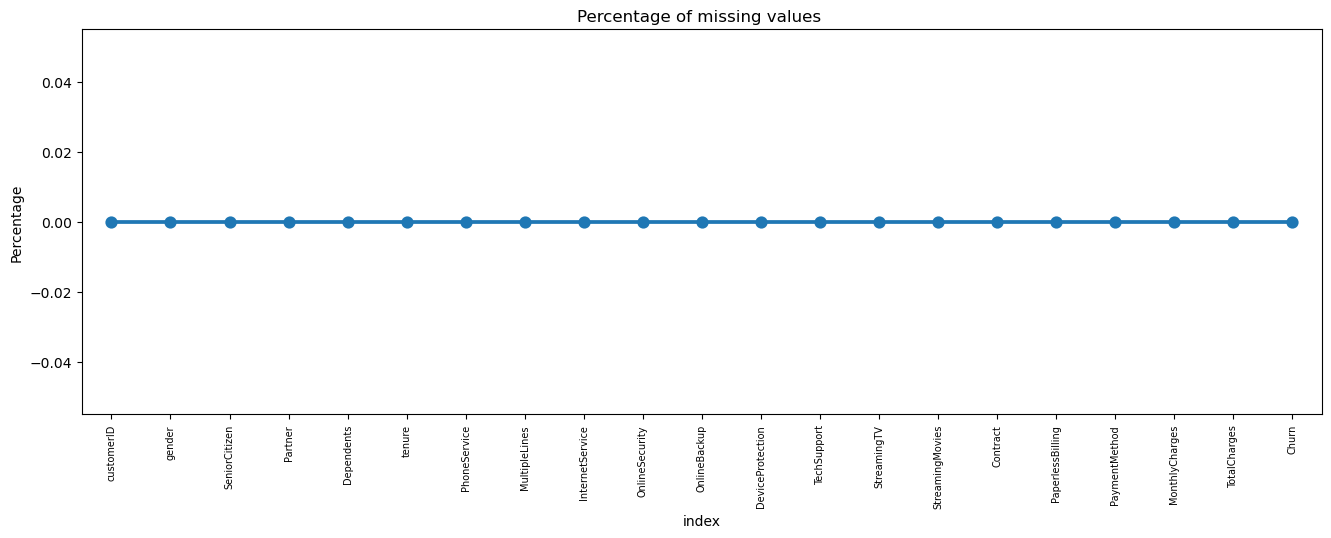

In [12]:

missing = pd.DataFrame((customer_churn.isnull().sum())*100/ customer_churn.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x ='index',y= 0,data = missing)
plt.xticks(rotation = 90 , fontsize = 7)
plt.title("Percentage of missing values ")
plt.ylabel('Percentage')
plt.show()
                       
                       

In [13]:
customer_churn_data = customer_churn.copy()

In [14]:
# Data Cleaning – TotalCharges Conversion

customer_churn.TotalCharges= pd.to_numeric(customer_churn.TotalCharges,errors='coerce')

customer_churn.TotalCharges.isnull().sum()

np.int64(11)

In [15]:
customer_churn.TotalCharges.dtype

dtype('float64')

In [16]:
# Handling Missing Values

customer_churn.loc[customer_churn['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [36]:
customer_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Tenure_group        0
dtype: int64

In [18]:
customer_churn.shape

(7043, 21)

In [19]:
customer_churn.dropna(how='any',inplace=True)

In [20]:
customer_churn.shape

(7032, 21)

In [21]:
customer_churn['tenure'].max()

72

## Feature Engineering – Tenure Grouping

In [22]:

# label = [f"{i} -{i+11}" for i in range(1,76,12)]

labels= ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]

customer_churn['Tenure_group'] = pd.cut(customer_churn.tenure,range(1,80,12),right=False,labels=labels)

In [23]:
customer_churn['Tenure_group'].value_counts().sort_index()

Tenure_group
1 - 12     2175
13 - 24    1024
25 - 36     832
37 - 48     762
49 - 60     832
61 - 72    1407
Name: count, dtype: int64

## Feature Reduction

In [24]:
customer_churn.drop(columns=['tenure','customerID'],axis=1,inplace=True)
customer_churn.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# ****Data Exploration****

## ****Univariate Analysis****

In [25]:
    # for i, predictor in enumerate (customer_churn.drop(columns=['MonthlyCharges','TotalCharges','Churn'])):
    #     plt.figure(i)
    #     sns.countplot(data=customer_churn,x=predictor,hue='Churn')

### ****Coverting the targer variable 'Churn 'in a binary numeric variable i.e Yes=1 ; No= 0****

In [26]:
customer_churn['Churn'] = np.where(customer_churn.Churn=='Yes',1,0)

In [ ]:
## Target Variable Encoding

In [27]:
# Convert all categorical variables into dummy variables

customer_dummies = pd.get_dummies(customer_churn)

customer_dummies = customer_dummies.astype(int)
customer_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_group_1 - 12,Tenure_group_13 - 24,Tenure_group_25 - 36,Tenure_group_37 - 48,Tenure_group_49 - 60,Tenure_group_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84,1990,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103,7362,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29,346,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74,306,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


## Relationship Between Charges 

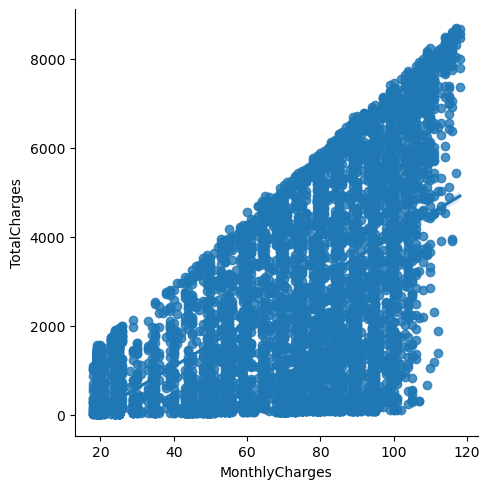

In [28]:
sns.lmplot(data=customer_dummies,x='MonthlyCharges',y='TotalCharges')

# Churn vs Monthly Charges

Text(0.5, 1.0, 'Monthly charges by Churn')

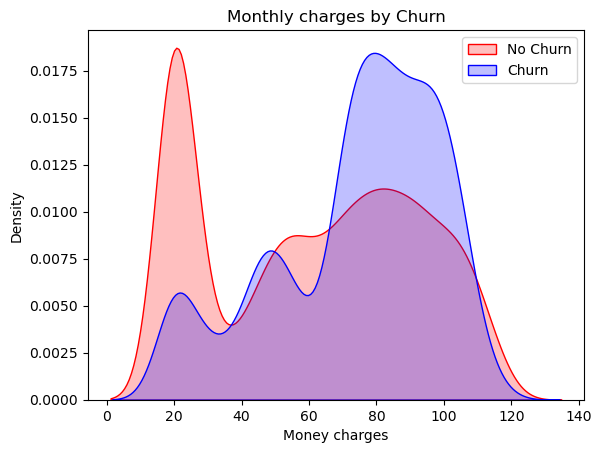

In [29]:
# Churn by monthly charges and monthly charges 

Mth = sns.kdeplot(customer_dummies.MonthlyCharges[(customer_dummies['Churn']==0)],color="red",shade=True)
Mth = sns.kdeplot(customer_dummies.MonthlyCharges[(customer_dummies['Churn']==1)],ax=Mth,color='blue',shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel("Money charges")
Mth.set_title("Monthly charges by Churn")


## Churn vs Total Charges

Text(0.5, 1.0, 'Total charges by Churn')

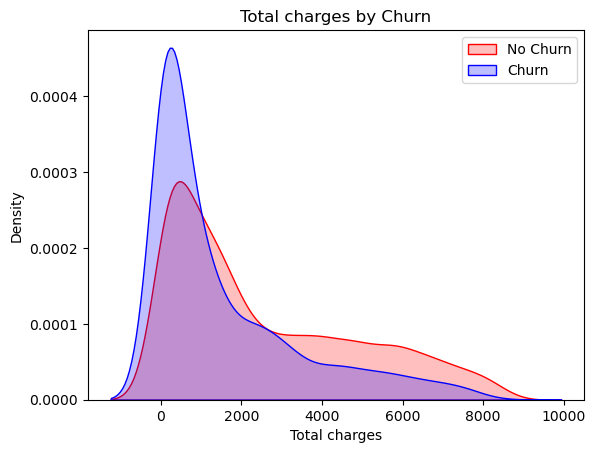

In [30]:
# Churn by monthly charges and Total charges 

Tot = sns.kdeplot(customer_dummies.TotalCharges[(customer_dummies['Churn']==0)],color="red",shade=True)
Tot = sns.kdeplot(customer_dummies.TotalCharges[(customer_dummies['Churn']==1)],ax=Tot,color='blue',shade=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel("Total charges")
Tot.set_title("Total charges by Churn")


## Correlation Analysis

<Axes: >

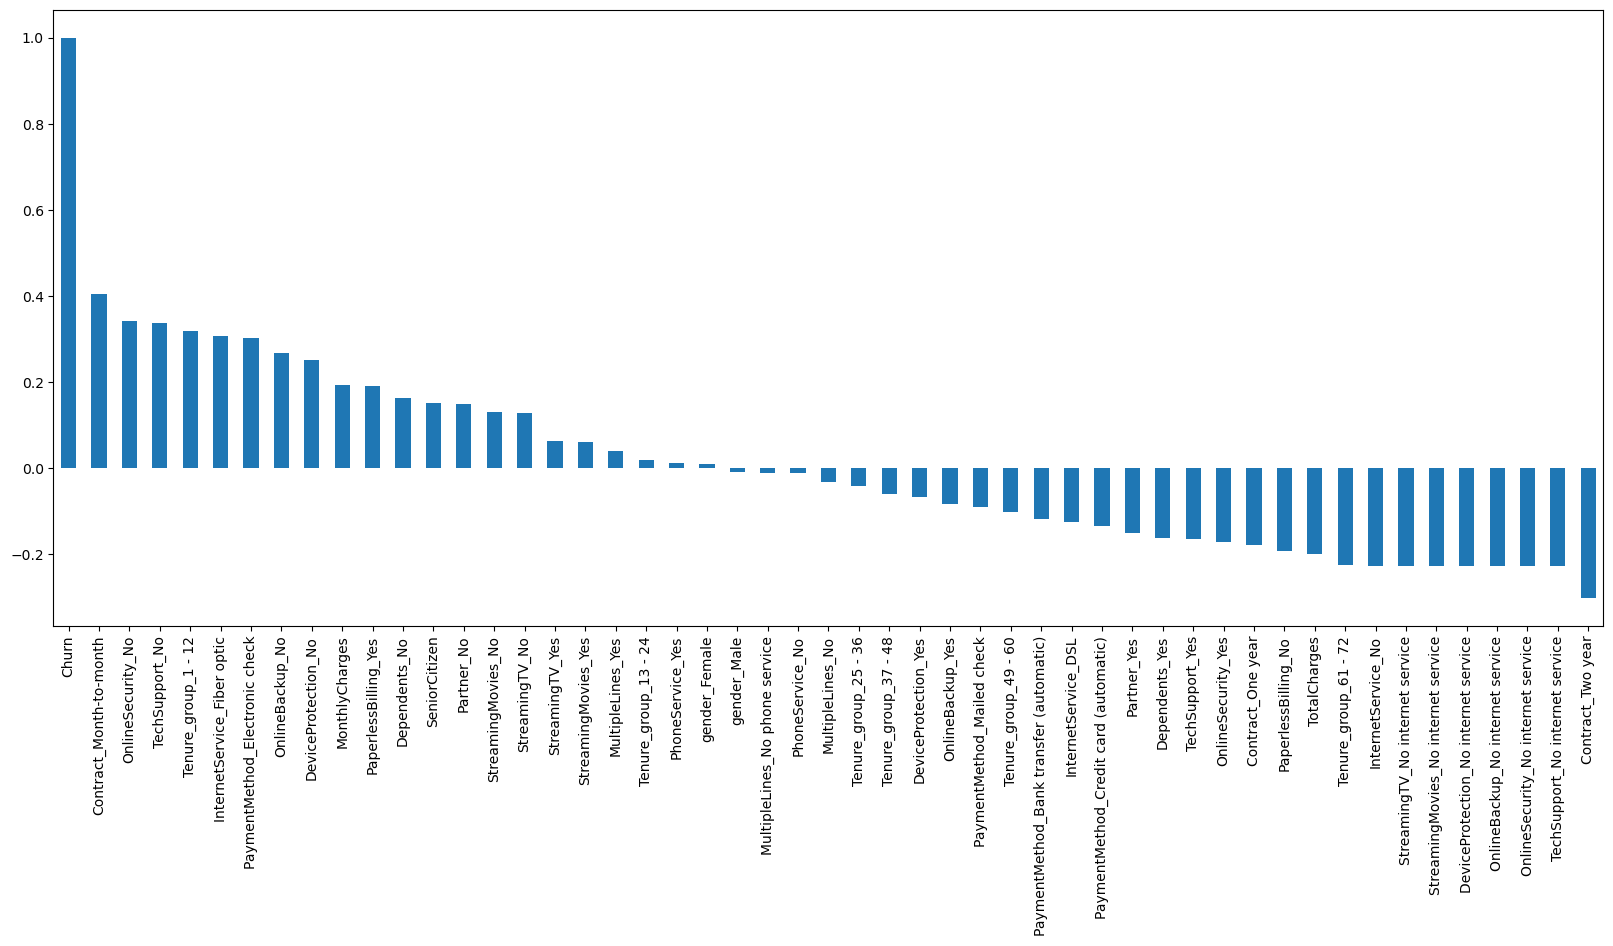

In [40]:
# Build a correlation of all predictos with Churn

plt.figure(figsize=(20,8))

customer_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

## ****Bivariate Analysis****

In [41]:
#Custom Visualization Function

New_df_target0 = customer_churn.loc[customer_churn['Churn']==0]
New_df_target1 = customer_churn.loc[customer_churn['Churn']==1]

def uniplot(customer_dummies, col, title, hue=None):

    plt.figure(figsize=(10, 6))
    sns.countplot(data=customer_dummies, x=col, hue=hue)

    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)

    plt.show()


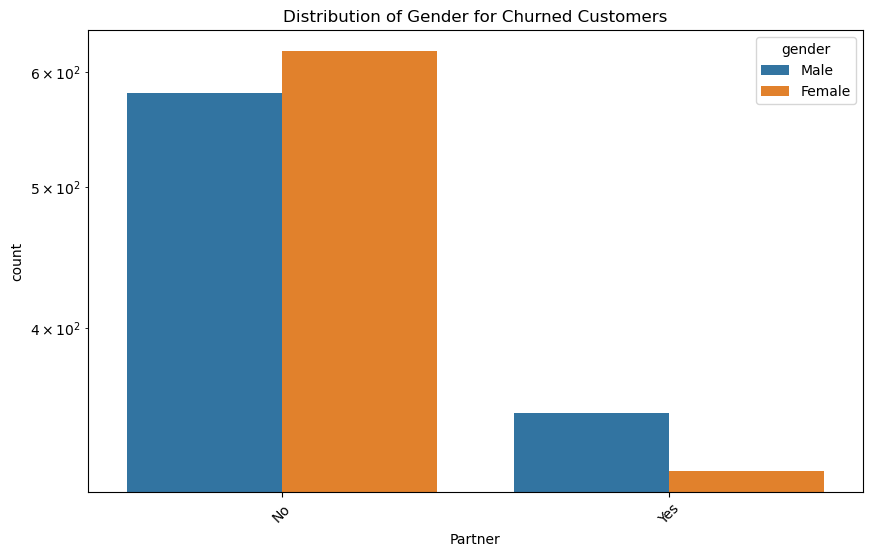

In [46]:
uniplot(New_df_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

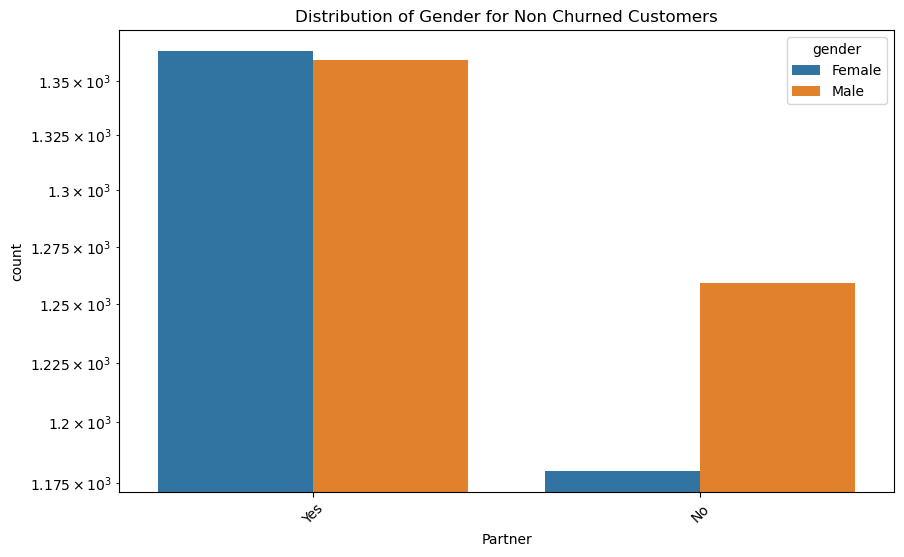

In [48]:
uniplot(New_df_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

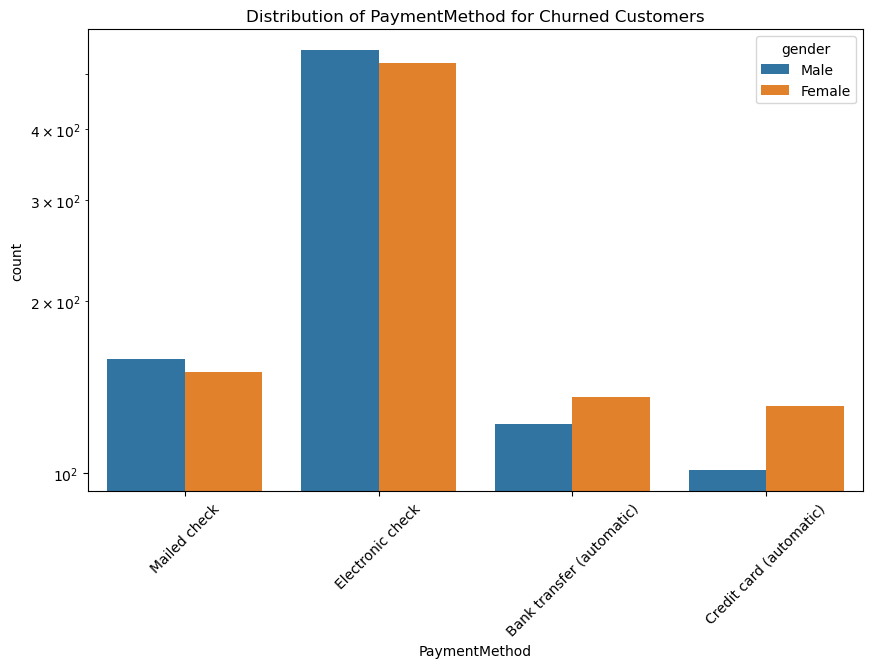

In [51]:
uniplot(New_df_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

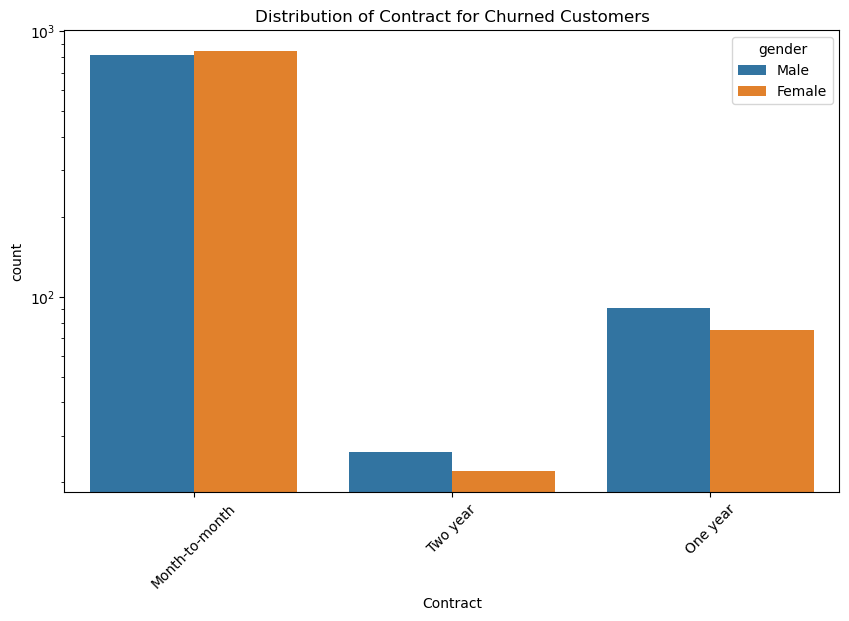

In [52]:
uniplot(New_df_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

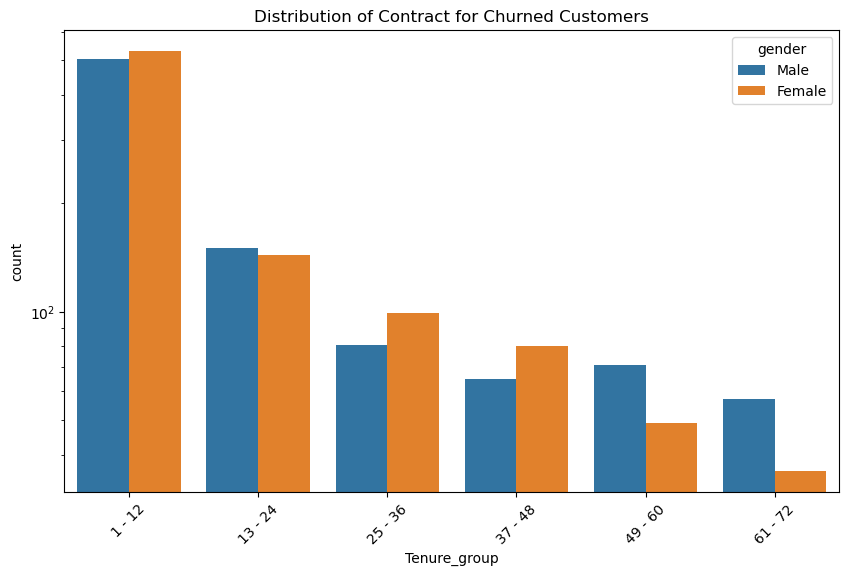

In [56]:
uniplot(New_df_target1,col='Tenure_group',title='Distribution of Tenure_group for Churned Customers',hue='gender')

## Conclusion

This project successfully delivered a comprehensive **end-to-end exploratory data analysis of customer churn** using the Telco Customer Churn dataset. Through systematic data cleaning, feature engineering, and in-depth univariate and bivariate analysis, key factors influencing customer attrition were identified.

The analysis revealed that **contract type, tenure, and monthly charges** play a critical role in customer churn behavior. Customers on **month-to-month contracts**, those with **shorter tenure**, and customers experiencing **higher monthly charges** are significantly more likely to churn. Additionally, **payment methods such as electronic checks** and the absence of value-added services (online security, tech support) were associated with higher churn rates. In contrast, long-term customers with **one-year or two-year contracts** showed strong retention patterns.

Correlation analysis further reinforced that **tenure-related features and billing variables** have a stronger relationship with churn compared to demographic factors such as gender or senior citizen status. This indicates that **customer behavior and service engagement**, rather than personal demographics, are the primary drivers of churn.

Overall, this analysis provides actionable insights that can help businesses **improve customer retention strategies**, such as incentivizing long-term contracts, optimizing pricing plans, enhancing service quality, and targeting high-risk customer segments early in their lifecycle. The findings also establish a strong foundation for building **predictive churn models** to proactively identify customers at risk of leaving and reduce revenue loss.
